In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import RobustScaler

In [6]:
drop_cols = ["time_stamp",
             "Machine1.Zone1Temperature.C.Actual", "Machine2.Zone1Temperature.C.Actual", "Machine3.Zone1Temperature.C.Actual",
             "Machine1.Zone2Temperature.C.Actual", "Machine2.Zone2Temperature.C.Actual", "Machine3.Zone2Temperature.C.Actual",
             "Machine2.ExitZoneTemperature.C.Actual", "Machine3.ExitZoneTemperature.C.Actual",
             "Machine1.MotorAmperage.U.Actual", "Machine2.MotorAmperage.U.Actual", "Machine3.MotorAmperage.U.Actual",
             "Machine2.MotorRPM.C.Actual",
             "FirstStage.CombinerOperation.Temperature3.C.Actual",
             "Machine4.Temperature1.C.Actual", "Machine4.Temperature2.C.Actual", "Machine4.Temperature3.C.Actual", "Machine4.Pressure.C.Actual",
             "Machine5.Temperature1.C.Actual", "Machine5.Temperature2.C.Actual", "Machine5.Temperature5.C.Actual"]

In [7]:
y_drop_cols = ["Stage1.Output.Measurement0.U.Actual", "Stage1.Output.Measurement0.U.Setpoint",
               "Stage1.Output.Measurement1.U.Actual", "Stage1.Output.Measurement1.U.Setpoint",
               "Stage1.Output.Measurement2.U.Actual", "Stage1.Output.Measurement2.U.Setpoint",
               "Stage1.Output.Measurement3.U.Actual", "Stage1.Output.Measurement3.U.Setpoint",
               "Stage1.Output.Measurement4.U.Actual", "Stage1.Output.Measurement4.U.Setpoint",
               "Stage1.Output.Measurement5.U.Actual", "Stage1.Output.Measurement5.U.Setpoint",
               "Stage1.Output.Measurement6.U.Actual", "Stage1.Output.Measurement6.U.Setpoint",
               "Stage1.Output.Measurement7.U.Actual", "Stage1.Output.Measurement7.U.Setpoint",
               "Stage1.Output.Measurement8.U.Actual", "Stage1.Output.Measurement8.U.Setpoint",
               "Stage1.Output.Measurement9.U.Actual", "Stage1.Output.Measurement9.U.Setpoint",
               "Stage1.Output.Measurement10.U.Actual", "Stage1.Output.Measurement10.U.Setpoint",
               "Stage1.Output.Measurement11.U.Actual", "Stage1.Output.Measurement11.U.Setpoint",
               "Stage1.Output.Measurement12.U.Actual", "Stage1.Output.Measurement12.U.Setpoint",
               "Stage1.Output.Measurement13.U.Actual", "Stage1.Output.Measurement13.U.Setpoint",
               "Stage1.Output.Measurement14.U.Actual", "Stage1.Output.Measurement14.U.Setpoint"]

In [48]:
df0_indexed = pd.read_csv("../Data/s2_df0_indexed.csv")

X0, y0 = df0_indexed.iloc[:, :86], df0_indexed.iloc[:, 86:88]

X0_reduced = X0.copy()
X0_reduced.drop(drop_cols, axis=1, inplace=True)
X0_reduced.drop(y_drop_cols, axis=1, inplace=True)

y0_Actual = y0.iloc[:, 0]

In [49]:
X0_reduced

,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.MotorRPM.C.Actual,Machine1.MaterialPressure.U.Actual,Machine1.MaterialTemperature.U.Actual,...,Machine3.MaterialTemperature.U.Actual,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual,Machine4.Temperature4.C.Actual,Machine4.Temperature5.C.Actual,Machine4.ExitTemperature.U.Actual,Machine5.Temperature3.C.Actual,Machine5.Temperature4.C.Actual,Machine5.Temperature6.C.Actual,Machine5.ExitTemperature.U.Actual
0,17.04,23.69,11.54,200,963.00,247,1262.34,10.55,425.88,80.6,...,68.6,105.7,113.9,17.0,302.0,163.0,266.8,238.8,64.0,150.5
1,17.04,23.69,11.54,200,963.00,247,1276.63,10.52,431.04,80.6,...,68.6,105.7,113.7,18.0,302.0,162.0,266.8,238.8,63.9,150.5
2,17.04,23.69,11.54,200,963.00,247,1260.29,10.45,430.07,80.7,...,68.7,105.1,113.9,17.0,303.0,163.0,266.8,238.8,63.7,147.4
3,17.04,23.69,11.54,200,963.00,247,1261.85,10.45,429.01,80.8,...,68.8,105.6,113.8,18.0,303.0,165.0,266.9,238.9,63.7,142.6
4,17.04,23.69,11.54,200,963.00,247,1262.58,10.52,423.58,80.8,...,68.8,105.4,114.9,16.0,303.0,164.0,267.0,238.9,63.6,142.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12153,13.84,24.43,12.22,201,1048.06,252,1263.76,12.21,424.53,83.7,...,74.9,115.4,106.5,18.0,311.0,195.0,270.0,244.7,63.7,155.4
12154,13.84,24.43,12.22,201,1048.06,252,1255.42,12.17,426.73,83.7,...,74.9,118.1,107.4,19.0,311.0,195.0,270.0,244.7,63.7,155.1
12155,13.84,24.43,12.22,201,1048.06,252,1257.52,12.14,429.77,83.7,...,74.9,118.1,108.0,17.0,311.0,195.0,270.0,244.7,63.7,155.1
12156,13.84,24.43,12.22,201,1048.06,252,1261.99,12.21,431.36,83.7,...,74.9,118.1,108.2,18.0,311.0,195.0,270.0,244.7,63.7,155.4


In [50]:
y0_Actual

0        11.10
1        11.10
2        11.21
3        11.14
4        11.05
         ...  
12153    12.91
12154    12.90
12155    13.08
12156    13.11
12157    13.11
Name: Stage2.Output.Measurement0.U.Actual, Length: 12158, dtype: float64

In [51]:
X0_transformed = RobustScaler().fit_transform(X0_reduced, y0_Actual)

In [52]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X0_transformed, y0_Actual, test_size=0.3, random_state=42)

In [53]:
RanFo = RandomForestRegressor(max_depth=10)
RanFo.fit(X0_train, y0_train)

y0_pred = RanFo.predict(X0_test)

RandomForestRegressor(max_depth=10)

<Figure size 1080x345.6 with 0 Axes>

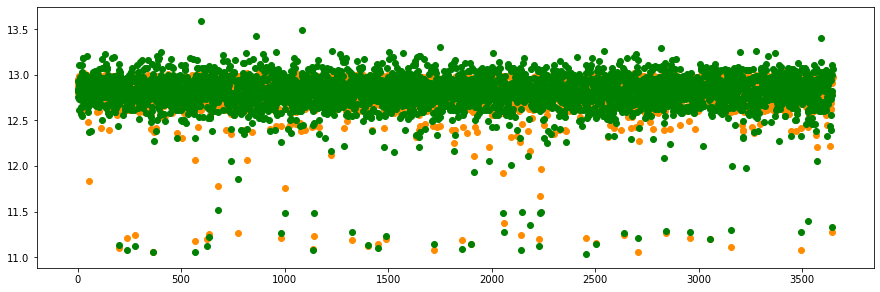

In [54]:
# test 데이터
plt.figure(figsize=(15, 4.8))
plt.scatter(np.arange(len(X0_test)), y0_pred, c="darkorange")
plt.scatter(np.arange(len(X0_test)), y0_test, c="green")

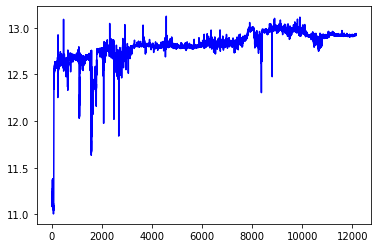

In [55]:
plt.plot(RanFo.predict(X0_transformed), "b")

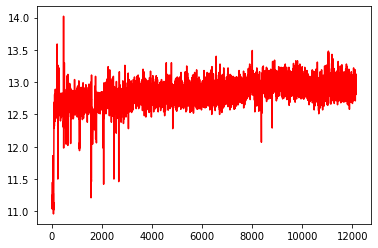

In [56]:
plt.plot(y0_Actual, "r")

In [57]:
mse = mean_squared_error(y0_test, y0_pred)
rmse = np.sqrt(mse)

mse
rmse

0.014534587921564734

0.12055947877112248

In [58]:
r2_score(y0_test, y0_pred)

0.7239256744104976